## Problem Statement
You are provided with a dataset containing various attributes of different wine samples. The goal of this assignment is to perform cluster analysis using the K-means algorithm to identify natural groupings in the data based on the attributes provided.

## Dataset Overview
The dataset consists of the following columns:
1. **Alcohol**: Alcohol content in the wine sample.
2. **Malic_Acid**: Amount of malic acid in the wine.
3. **Ash**: Ash content in the wine.
4. **Ash_Alcalinity**: Alkalinity of ash in the wine.
5. **Magnesium**: Magnesium content in the wine.
6. **Total_Phenols**: Total phenols content in the wine.
7. **Flavanoids**: Flavonoid content in the wine.
8. **Nonflavanoid_Phenols**: Non-flavonoid phenol content in the wine.
9. **Proanthocyanins**: Proanthocyanin content in the wine.
10. **Color_Intensity**: Intensity of the color of the wine.
11. **Hue**: Hue of the wine.
12. **OD280**: Ratio of OD280/OD315 of diluted wines.
13. **Proline**: Proline content in the wine.

In [121]:
import pandas as pd

In [122]:
df = pd.read_csv('WineData.csv')
df.head()

,Unnamed: 0,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [123]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [124]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
df5 = df.copy()
df6 = df.copy()
df7 = df.copy()
df8 = df.copy()
df9 = df.copy()
df10 = df.copy()
df11 = df.copy()

In [125]:
df.shape

(178, 13)

## Tasks

### Task 1: Data Preprocessing
- Handle any missing values if present.
- Scale the data using `StandardScaler` or `MinMaxScaler` since K-means is sensitive to the scale of features.
- Remove any unnecessary columns that don't contribute to clustering (e.g., index column if not relevant).

In [126]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [127]:
df.shape

(178, 13)

In [128]:
df.info

<bound method DataFrame.info of      Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  

In [129]:
df1.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

#### Comments on null value handling
The above analysis indicates there is no null value in the feature columns of wine data.

### Scale the data

In [130]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [131]:
sds = StandardScaler()

In [132]:
df1_scaled= sds.fit_transform(df1)
df1_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]], shape=(178, 13))

In [133]:
df1_scaled = pd.DataFrame(df1_scaled, columns = df1.columns)
df1_scaled.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [134]:
df1_scl=df1_scaled.copy()
df2_scl=df1_scaled.copy()
df3_scl=df1_scaled.copy()
df4_scl=df1_scaled.copy()

In [135]:
df1_scaled.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


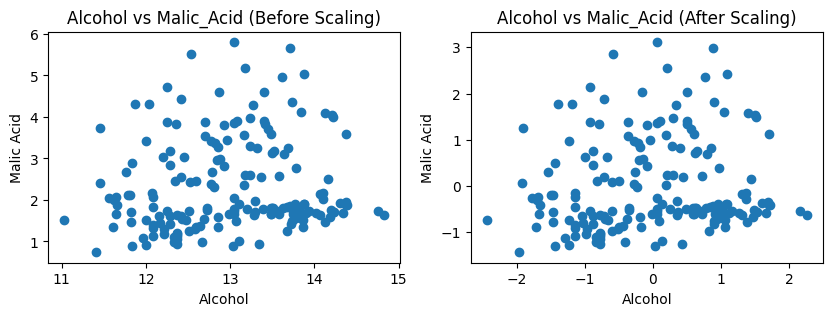

<Figure size 640x480 with 0 Axes>

In [136]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.scatter(df1.Alcohol,df1.Malic_Acid) # This plot is for original data before scaling
plt.ylabel('Malic Acid', fontsize=10)
plt.xlabel('Alcohol', fontsize=10)
plt.title('Alcohol vs Malic_Acid (Before Scaling)', fontsize=12)

plt.subplot(1,2,2)
plt.scatter(df1_scaled.Alcohol,df1_scaled.Malic_Acid) # This plot is for scaled data after scaling
plt.ylabel('Malic Acid', fontsize=10)
plt.xlabel('Alcohol', fontsize=10)
plt.title('Alcohol vs Malic_Acid (After Scaling)', fontsize=12)

plt.show()
plt.tight_layout()

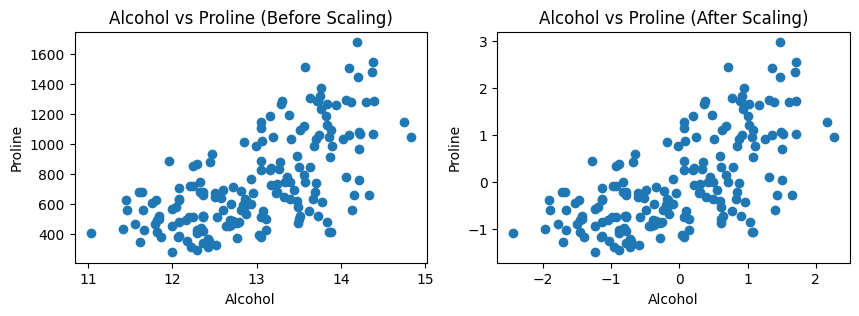

<Figure size 640x480 with 0 Axes>

In [137]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.scatter(df1.Alcohol,df1.Proline) # This plot is for original data before scaling
plt.ylabel('Proline', fontsize=10)
plt.xlabel('Alcohol', fontsize=10)
plt.title('Alcohol vs Proline (Before Scaling)', fontsize=12)

plt.subplot(1,2,2)
plt.scatter(df1_scaled.Alcohol,df1_scaled.Proline) # This plot is for scaled data after scaling
plt.ylabel('Proline', fontsize=10)
plt.xlabel('Alcohol', fontsize=10)
plt.title('Alcohol vs Proline (After Scaling)', fontsize=12)

plt.show()
plt.tight_layout()

#### Comments on scaling
All the values are scaled in a way that there is no big difference in the feature values. 
Even the Proline column values are scaled according to other features.
However, data visualization is almost similar in both cases of before and after scaling.

### Minmax scaling

In [138]:
mmx = MinMaxScaler()

In [139]:
df2_min_max = mmx.fit_transform(df2)
df2_min_max = pd.DataFrame(df2_min_max, columns = df2.columns)
df2_min_max.head() #modified data set 

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [140]:
df.head()  #original data set

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Task 2: Determine the Optimal Number of Clusters
- Use the **Elbow method** to determine the optimal number of clusters.
- Visualize the results using a line plot of the **Within-Cluster Sum of Squares (WCSS)** against the number of clusters.



In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings as wr
wr.filterwarnings('ignore')

In [142]:
#sns.pairplot(df1_scaled[['Alcohol','Malic_Acid','Ash', 'Ash_Alcanity', 'Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','Hue','OD280','Proline']])
#plt.savefig('image.png')

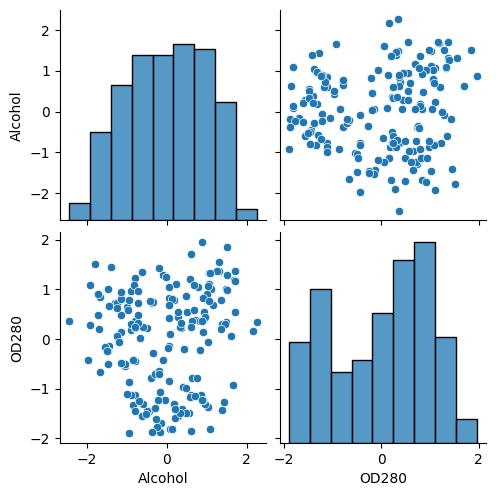

In [143]:
sns.pairplot(df1_scaled[['Alcohol','OD280']])
plt.savefig('image.png')

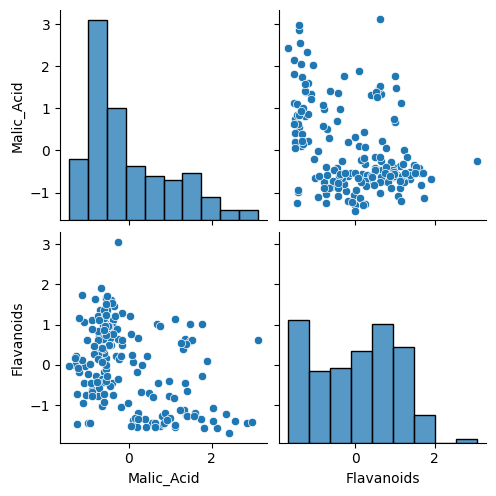

In [144]:
sns.pairplot(df1_scaled[['Malic_Acid','Flavanoids']])
plt.savefig('image.png')

In [145]:
from sklearn.cluster import KMeans

In [146]:
km_1=KMeans()

In [147]:
df1_scaled['Clust'] = km_1.fit_predict(df1_scaled[['Alcohol','OD280']]) #To create new column which includes the results of cluster
df1_scaled.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Clust
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,3
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,3
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0


In [148]:
km_1.cluster_centers_

array([[ 0.47780219,  0.40039349],
       [-0.46284396, -1.27148655],
       [-1.25928038, -0.2748989 ],
       [ 1.29888511,  0.9781972 ],
       [ 1.09615192, -1.24815508],
       [ 0.39177639, -1.34498589],
       [-1.53712417,  0.83272629],
       [-0.66115502,  0.67993801]])

In [149]:
df0_0=df1_scaled[df1_scaled.Clust==0]
df0_0.shape

(31, 14)

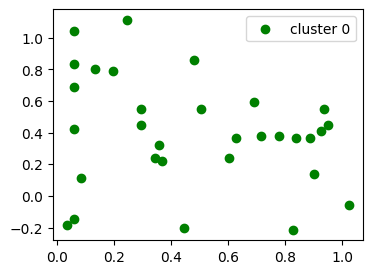

In [150]:
plt.figure(figsize=(4,3))
plt.scatter(df0_0.Alcohol, df0_0.OD280, color='green', label='cluster 0')
plt.legend()
plt.show()

In [151]:
df0_0.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Clust
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0
12,0.925685,-0.544297,0.158946,-1.049479,-0.754202,0.488531,0.733629,-0.578985,0.383884,0.234414,0.844785,0.407228,1.825055,0
15,0.777454,-0.472483,1.218995,-0.689137,0.860705,0.889114,0.884224,-0.498407,-0.229346,0.969783,1.415139,0.378979,1.793210,0


In [152]:
df0_1=df1_scaled[df1_scaled.Clust==1]
df0_1.shape

(27, 14)

In [153]:
df0_2=df1_scaled[df1_scaled.Clust==2]
df0_3=df1_scaled[df1_scaled.Clust==3]
df0_4=df1_scaled[df1_scaled.Clust==4]
df0_5=df1_scaled[df1_scaled.Clust==5]
df0_6=df1_scaled[df1_scaled.Clust==6]
df0_7=df1_scaled[df1_scaled.Clust==7]

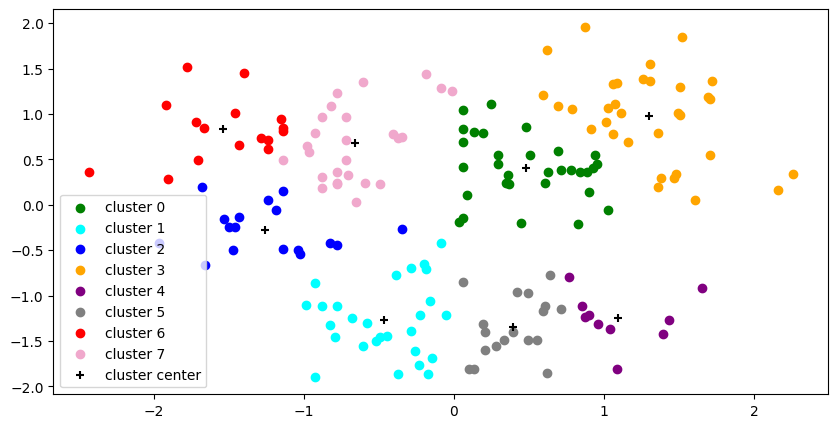

In [154]:
plt.figure(figsize=(10,5))
plt.scatter(df0_0.Alcohol, df0_0.OD280, color='green', label='cluster 0')
plt.scatter(df0_1.Alcohol, df0_1.OD280, color='cyan', label='cluster 1')
plt.scatter(df0_2.Alcohol, df0_2.OD280, color='blue', label='cluster 2')
plt.scatter(df0_3.Alcohol, df0_3.OD280, color='orange', label='cluster 3')
plt.scatter(df0_4.Alcohol, df0_4.OD280, color='purple', label='cluster 4')
plt.scatter(df0_5.Alcohol, df0_5.OD280, color='gray', label='cluster 5')
plt.scatter(df0_6.Alcohol, df0_6.OD280, color='red', label='cluster 6')
plt.scatter(df0_7.Alcohol, df0_7.OD280, color='#F0A8CC', label='cluster 7')

plt.scatter(km_1.cluster_centers_[:,0], km_1.cluster_centers_[:,1], marker = '+', label='cluster center', color='black')

plt.legend()
plt.show()

### WCSS (within cluster sum of square) for Alcohol and OD280

In [155]:
WCSS = []
for k in range(1, 15):
    km2= KMeans(n_clusters=k)
    km2.fit(df1_scaled[['Alcohol', 'OD280']])
    WCSS.append(km2.inertia_)

In [156]:
WCSS

[356.0,
 215.63304811894744,
 99.11439350691168,
 86.00042085397781,
 64.39700387842173,
 60.544135135304614,
 46.468059442855,
 40.414055213836086,
 37.19455326573806,
 33.43175991194739,
 30.754542150925186,
 29.61438287273917,
 24.279422778412876,
 22.762596007412476]

Text(0, 0.5, 'WCSS')

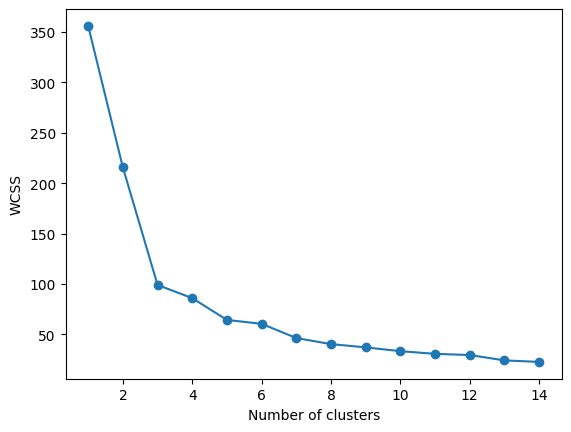

In [157]:
plt.plot(range(1,15), WCSS, marker='o')
plt.xlabel('Number of clusters',fontsize=10)
plt.ylabel('WCSS',fontsize=10)

In [181]:
#pip install kneed

In [159]:
from kneed import KneeLocator

In [160]:
kne1 = KneeLocator(range(1,15), WCSS, curve='convex', direction = 'decreasing')

In [161]:
kne1.knee         ## Indicates optimal cluster number for KMeans analysis

np.int64(3)

Text(0, 0.5, 'WCSS')

<Figure size 400x300 with 0 Axes>

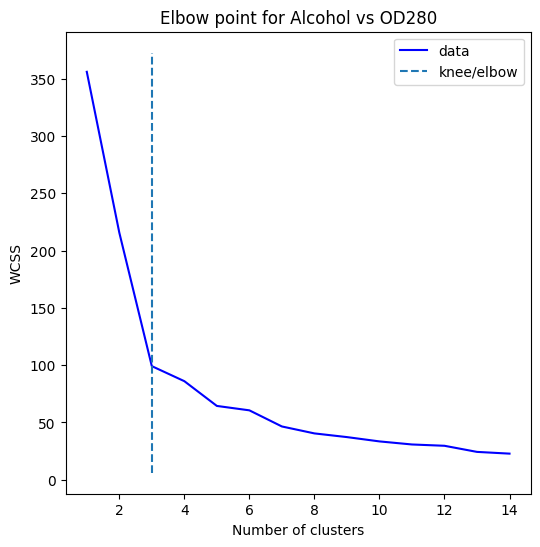

In [162]:
plt.figure(figsize=(4,3))
kne1.plot_knee()
plt.title('Elbow point for Alcohol vs OD280')
plt.xlabel('Number of clusters',fontsize=10)
plt.ylabel('WCSS',fontsize=10)

#### Comments on Elbow point analysis for optimal number of clusters 
Above elbow point analysis indicates that the optimal number of clusters is 3 for the analysis of alcohol and optical density.

### WCSS for Malic_acid and Flavanoids

In [163]:
wcss_1=[]
for k in range(1,15):
    km3=KMeans(n_clusters=k)
    km3.fit(df1_scaled[['Malic_Acid','Flavanoids']])
    wcss_1.append(km3.inertia_)

In [164]:
wcss_1

[356.00000000000006,
 165.0433720928267,
 109.7943553187921,
 83.24280834189986,
 58.368284486000476,
 46.743353737646636,
 42.01217419479104,
 36.69278395649019,
 33.77438532853665,
 30.062449536013986,
 26.73330618885675,
 23.874215708995223,
 22.095035221070656,
 21.100984066823877]

Text(0, 0.5, 'WCSS')

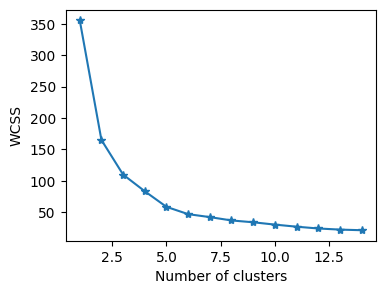

In [165]:
plt.figure(figsize=(4,3))
plt.plot(range(1,15), wcss_1, marker='*')
plt.xlabel('Number of clusters',fontsize=10)
plt.ylabel('WCSS',fontsize=10)

In [166]:
kne_2=KneeLocator(range(1,15), wcss_1, curve='convex', direction = 'decreasing')

In [167]:
kne_2.knee # Indicates optimal cluster number for KMeans analysis

np.int64(4)

Text(0, 0.5, 'WCSS')

<Figure size 500x300 with 0 Axes>

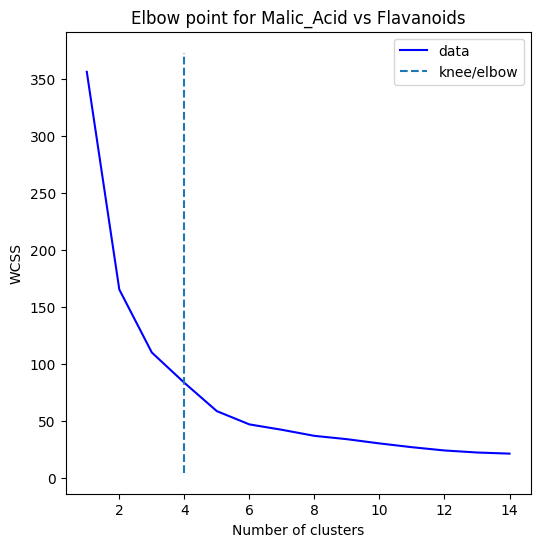

In [185]:
plt.figure(figsize=(5,3))
kne_2.plot_knee()
plt.title('Elbow point for Malic_Acid vs Flavanoids')
plt.xlabel('Number of clusters',fontsize=10)
plt.ylabel('WCSS',fontsize=10)

#### Comments on Elbow point Analysis for optimal number of cluster
Above elbow point analysis indicates that the optimal number of clusters is 4 for the analysis of Malic_Acid and Flavanoids

### Task 3: K-means Clustering
- Apply K-means clustering using the optimal number of clusters obtained from the Elbow method.
- Assign cluster labels to each data point and create a new column in the dataset with these labels.



### The optimal number of clusters is 3 for the analysis of alcohol and optical density

In [169]:
km_2 = KMeans(n_clusters=3) #for Alcohol vs OD280

In [170]:
df2_scl['clust'] = km_2.fit_predict(df2_scl[['Alcohol','OD280']]) #To create new column which includes the results of cluster
df2_scl.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,clust
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1


In [171]:
km_2.cluster_centers_

array([[-1.1233104 ,  0.39915679],
       [ 0.88140586,  0.75381963],
       [ 0.09849126, -1.25177292]])

### The optimal number of clusters is 4 for the analysis of Malic_Acid and Flavonoids

In [172]:
km_3 = KMeans(n_clusters=4) #for Malic_Acid vs Flavanoids

In [173]:
df3_scl['clust'] = km_3.fit_predict(df3_scl[['Malic_Acid','Flavanoids']]) #To create new column which includes the results of cluster
df3_scl.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,clust
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0


In [174]:
km_3.cluster_centers_

array([[-0.4546549 ,  0.95882425],
       [ 1.85315457, -0.47228955],
       [-0.76197985, -0.3632047 ],
       [ 0.6602552 , -1.22881226]])

### Task 4: Cluster Analysis
- Analyze the clusters by comparing the mean values of each feature within each cluster.
- Visualize the clusters using a pairplot or scatterplot for selected features to understand the separations visually.



In [175]:
import pandas as pd
cluster_analysis = df2_scl.groupby('clust').mean()
cluster_analysis

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
clust,,,,,,,,,,,,,
0,-1.123310,-0.355627,-0.320165,0.298586,-0.345460,-0.007619,0.128560,-0.033644,0.247784,-0.921629,0.450708,0.399157,-0.759958
1,0.881406,-0.268231,0.231490,-0.584268,0.380014,0.817625,0.885614,-0.590142,0.477957,0.139182,0.454649,0.753820,0.996156
2,0.098491,0.655265,0.050568,0.372923,-0.093950,-0.924894,-1.136215,0.706023,-0.788476,0.746744,-0.961260,-1.251773,-0.389342


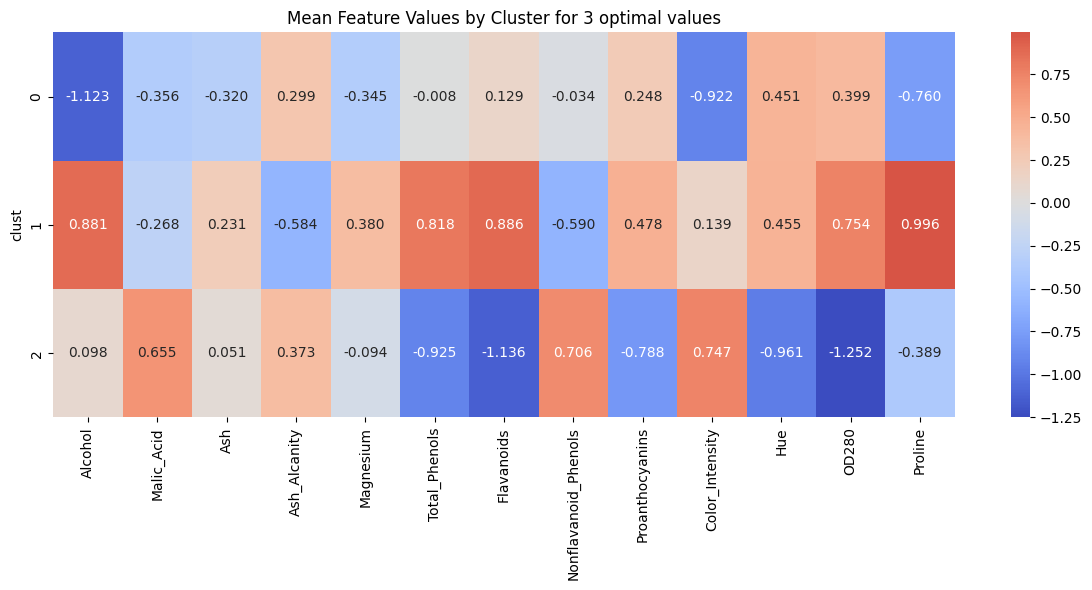

In [176]:
plt.figure(figsize=(12, 6))
# Create the heatmap. `annot=True` displays the number in each cell.
sns.heatmap(cluster_analysis,
            annot=True,   # Annotate with correlation values
            fmt='.3f', # Format numbers to 2 decimal places
            cmap='coolwarm',  # Choose a color map
            cbar=True,
            center=0) # Center the colormap at 0 (crucial for standardized data!)

plt.title('Mean Feature Values by Cluster for 3 optimal values')
plt.tight_layout()
plt.show()

### Comments on cluster mean of the features (for 3 optimal value)
**Cluster-0** the highest mean value features found for Malic_acid, Ash_Alcanity, Nonflavanoid_phenols and Color_Intensity. 
However, the alcohol's mean value is in between other two clusters. 
Therefore, the wine in these clusters can be classified as moderate-quality.

**Cluster-1** Most of the features mean value higher than two cluters and have the highest mean value for alcohol.
Therefore, these groups' wines may be classified as good-quality wines.

**Cluster-2** These group wines have lower mean values for features compared to other two group and have the lowest mean value for alcohol.
Therefore, these groups' wines may be classified as poor-quality wines in terms of alcohol content.

In [177]:
cluster_analysis_1 = df3_scl.groupby('clust').mean()
cluster_analysis_1

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
clust,,,,,,,,,,,,,
0,0.474642,-0.454655,0.257945,-0.429724,0.227810,0.876206,0.958824,-0.511837,0.574423,0.002148,0.520609,0.712669,0.703759
1,0.098058,1.853155,0.073186,0.440396,-0.216800,-0.339135,-0.472290,0.363158,-0.079745,0.131928,-0.817342,-0.373418,-0.418911
2,-0.750157,-0.761980,-0.546230,0.104741,-0.281724,-0.400095,-0.363205,0.231832,-0.195399,-0.600806,0.368210,-0.086833,-0.586005
3,-0.022381,0.660255,0.179507,0.451946,0.086164,-1.095774,-1.228812,0.508819,-0.934560,0.789185,-1.059595,-1.169853,-0.364086


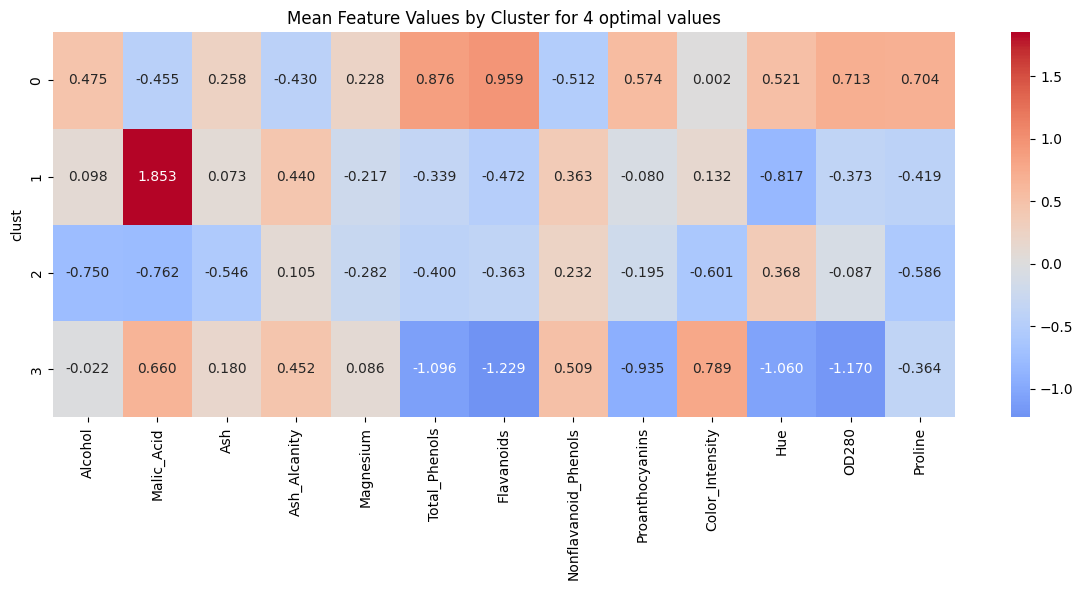

In [178]:
plt.figure(figsize=(12, 6))
# Create the heatmap. `annot=True` displays the number in each cell.
sns.heatmap(cluster_analysis_1,
            annot=True,   # Annotate with correlation values
            fmt='.3f', # Format numbers to 2 decimal places
            cmap='coolwarm',  # Choose a color map
            cbar=True,
            center=0) # Center the colormap at 0 (crucial for standardized data!)

plt.title('Mean Feature Values by Cluster for 4 optimal values')
plt.tight_layout()
plt.show()

### Comments on cluster mean of the features (for 3 optimal value)
**Cluster-0** the highest mean value features found for Malic_acid, Ash_Alcanity, Nonflavanoid_phenols and Color_Intensity. 
However, the alcohol's mean value is better than other two clusters except cluster-1. 
Therefore, the wine in these clusters can be classified as moderate-quality.

**Cluster-1** Most of the features mean value higher than three cluters and have the highest mean value for alcohol.
Therefore, these groups' wines may be classified as good-quality wines.

**Cluster-2** These group wines have lower mean values for features compared to other three groups and have the lowest mean value for alcohol. Therefore, these groups' wines may be classified as very-poor-quality wines in terms of alcohol content.

**Cluster-3** These group wines have low alcohol mean than cluster-1 and cluster-0, but have the highest Malic_Acid mean value.
However, these group's mean values are higher compared to cluster-2 and cluster-0 group.
Therefore, these groups' wines may be classified as poor-quality wines in terms of alcohol content, but superior in terms of malic acid content

# Task 5: Interpretation
- Interpret the characteristics of each cluster. For example, identify which cluster has the highest alcohol content, or which has the most intense color, etc.
- Suggest potential names or categories for each cluster based on the observed characteristics.


Text(0.5, 1.0, 'Cluster analysis for Alcohol vs OD280')

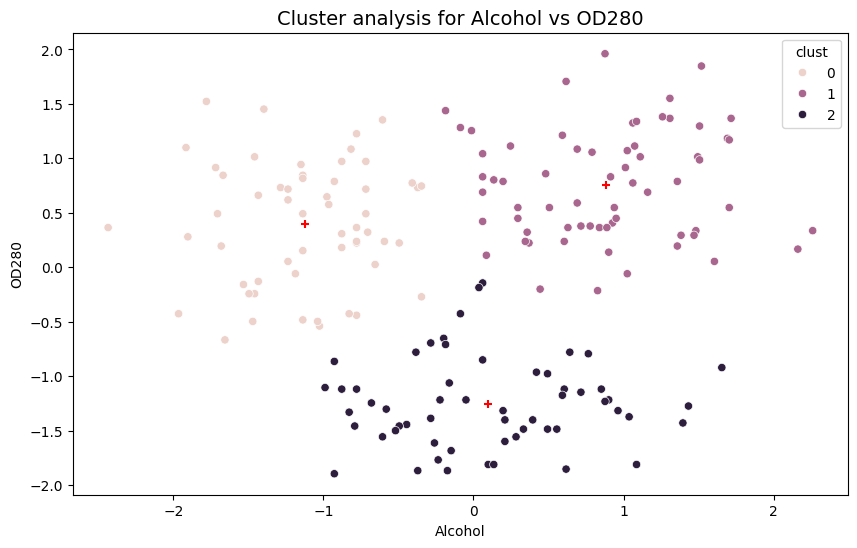

In [179]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=df2_scl, x='Alcohol', y='OD280', hue='clust')
plt.scatter(km_2.cluster_centers_[:,0], km_2.cluster_centers_[:,1], marker = '+', label='cluster center', color='red')

plt.title('Cluster analysis for Alcohol vs OD280', fontsize=14)

### Interpretation for optimal cluster 3
Based on alcohol and optical density the wines can be categorized into below 3 classes based on cluster analysis.

**Class-1:** Wines which are in cluster group 0 have the **higher Alcohol content and higher optical density**

**Class-2:** Wines which are in cluster group 1 have the **lower Alcohol content and higher optical density** 

**Class-3:** Wines which are in cluster group 2 have the **average Alcohol content and lower optical density**

Text(0.5, 1.0, 'Cluster analysis for Malic_Acid vs Flavanoids')

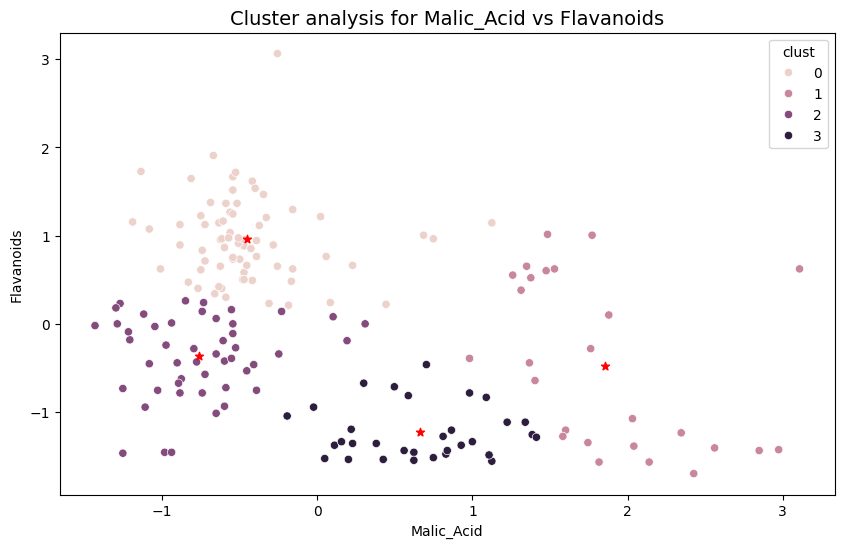

In [180]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=df3_scl, x='Malic_Acid', y='Flavanoids', hue='clust')
plt.scatter(km_3.cluster_centers_[:,0], km_3.cluster_centers_[:,1], marker = '*', label='cluster center', color='red')

plt.title('Cluster analysis for Malic_Acid vs Flavanoids', fontsize=14)

### Interpretation for optimal cluster 4
Based on Malic_Acid and Flavanoids, the wines can be categorized into below 4 classes based on cluster analysis.

**Class-1:** Wines which are in cluster group 0 have the **higher Malic_Acid content and lower Flavanoids content** 

**Class-2:** Wines which are in cluster group 1 have the **higher Malic_Acid content and Higher Flavanoids content**  

**Class-3:** Wines which are in cluster group 2 have the **lower Malic_Acid content and Higher Flavanoids content**

**Class-4:** Wines which are in cluster group 3 have the **lower to no Malic_Acid content and Flavanoids content**

# Best of Luck